# Importando dados da web

1. Faça o download do arquivo **winequality-white.csv** que está armazenado no endereço **https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/**.

In [1]:
import pandas as pd
from urllib.request import urlretrieve

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'datasets/winequality-white.csv')

('datasets/winequality-white.csv', <http.client.HTTPMessage at 0x1175d6c88>)

2. Verifique a estrutura do arquivo **winequality-white.csv** com os comandos **head** and **tail** do Linux.

In [3]:
arquivo = 'datasets/winequality-white.csv'
!head -n 5 $arquivo

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6


In [4]:
!tail -n 5 $arquivo

6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5;11.2;6
6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;9.6;5
6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0.46;9.4;6
5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.38;12.8;7
6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;11.8;6


3. Importe o arquivo **winequality-white.csv** para o dataframe **whites**.

In [42]:
whites = pd.read_csv(arquivo, sep=';')
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


4. Plote um histrograma da qualidade (**quality**) dos vinhos brancos armazenados no dataframe **whites**.

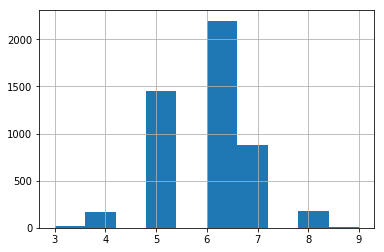

In [43]:
whites['quality'].hist(bins=10)

5. Faça o download do arquivo (**http://www.anp.gov.br/arquivos/dadosabertos/infp/t1-08-transformado.csv**) que contém informações sobre o consumo de gás natural, segundo regiões geográficas, países e blocos econômicos – 2008-2017, segundo o Anuário Estatístico 2018. Armazene o seu conteúdo no arquivo **datasets/consumo_de_gas_2018.csv**

In [44]:
url = 'http://www.anp.gov.br/arquivos/dadosabertos/infp/t1-08-transformado.csv'
urlretrieve(url, 'datasets/consumo_de_gas_2018.csv')

('datasets/consumo_de_gas_2018.csv', <http.client.HTTPMessage at 0x121869198>)

6. Verifique a estrutura do arquivo **consumo_de_gas_2018.csv** com os comandos **head** and **tail** do Linux.

In [45]:
arquivo = 'datasets/consumo_de_gas_2018.csv'
!head -n 5 $arquivo

In [46]:
!tail -n 5 $arquivo

7. Importe o arquivo **consumo_de_gas_2018.csv** para o dataframe **consumos**. Utilize o parâmetro **encoding='iso-8859-1'** no comando **read_csv** para a conversão correta de acentos e **thousands=','** para que a virgula seja interpretada corretamente como separado de milhar.

In [47]:
consumos = pd.read_csv(arquivo
                       , sep=';'
                       , encoding='iso-8859-1'
                       , thousands=',')
consumos.head()

,REGIÃO,PAÍS,VALOR DO CONSUMO EM BILHÕES m3,ANO
0,América do Norte,Canadá,89347225,2008
1,América do Norte,Estados Unidos,6288911777,2008
2,América do Norte,México,5999657839,2008
3,Américas Central e do Sul,Argentina,43188725,2008
4,Américas Central e do Sul,Brasil,2609712052,2008


8. Modifique o nomes das colunas do dataframe consumos para **'regiao, pais, valor e ano'**.

In [48]:
consumos.columns = ['regiao', 'pais', 'valor', 'ano']
consumos.head()

,regiao,pais,valor,ano
0,América do Norte,Canadá,89347225,2008
1,América do Norte,Estados Unidos,6288911777,2008
2,América do Norte,México,5999657839,2008
3,Américas Central e do Sul,Argentina,43188725,2008
4,Américas Central e do Sul,Brasil,2609712052,2008


9. Plote um gráfico de linhas do consumo médio da (**América do Sul**) por ano.

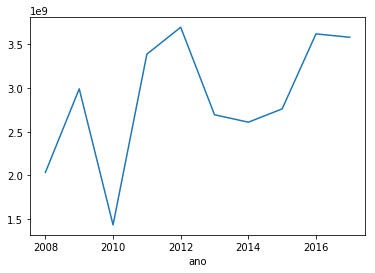

In [49]:
import matplotlib.pyplot as plt
resumo = consumos.loc[consumos['regiao'] == 'Américas Central e do Sul']
resumo = resumo.groupby(resumo['ano'], as_index=False)['valor'].mean()
resumo.plot(kind='line', x='ano', y='valor', legend=None)

10. Leia a página **https://en.wikipedia.org/wiki/Data_science** utilizando o método **Request**.

In [50]:
from urllib.request import urlopen, Request
url = 'https://en.wikipedia.org/wiki/Data_science'
request  = Request(url)
response = urlopen(request)
html = response.read()
response.close()

11. Exiba a página html lida.

In [51]:
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":899407109,"wgRevisionId":899407109,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Use dmy dates from December 2012","All articles with unsourced statements","Articles with unsourced statements from April 2018","Information science","Computer occupations","Computational fields of study","Data analysis"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",

12. Leia a página **https://en.wikipedia.org/wiki/Data_science** utilizando o pacote **requests**.

In [52]:
import requests
r = requests.get(url)
html = r.text

13. Exiba a página html lida.

In [53]:
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":899407109,"wgRevisionId":899407109,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Use dmy dates from December 2012","All articles with unsourced statements","Articles with unsourced statements from April 2018","Information science","Computer occupations","Computational fields of study","Data analysis"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["","

14. Exiba o título da página lida utilizando o método **BeautifulSoup**

In [54]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
print(soup.title)

<title>Data science - Wikipedia</title>


15. Exiba o texto da página lida utilizando o método **BeautifulSoup**

In [55]:
print(soup.get_text())




Data science - Wikipedia
document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":899407109,"wgRevisionId":899407109,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Use dmy dates from December 2012","All articles with unsourced statements","Articles with unsourced statements from April 2018","Information science","Computer occupations","Computational fields of study","Data analysis"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","Septe

15. Exiba os hypelinks da página lida utilizando o método **BeautifulSoup**

In [56]:
for link in soup.find_all('a'):
    print(link.get('href'))


None
#mw-head
#p-search
/wiki/Information_science
/wiki/Machine_learning
/wiki/Data_mining
/wiki/File:Kernel_Machine.svg
/wiki/Statistical_classification
/wiki/Cluster_analysis
/wiki/Regression_analysis
/wiki/Anomaly_detection
/wiki/Automated_machine_learning
/wiki/Association_rule_learning
/wiki/Reinforcement_learning
/wiki/Structured_prediction
/wiki/Feature_engineering
/wiki/Feature_learning
/wiki/Online_machine_learning
/wiki/Semi-supervised_learning
/wiki/Unsupervised_learning
/wiki/Learning_to_rank
/wiki/Grammar_induction
/wiki/Supervised_learning
/wiki/Statistical_classification
/wiki/Regression_analysis
/wiki/Decision_tree_learning
/wiki/Ensemble_learning
/wiki/Bootstrap_aggregating
/wiki/Boosting_(machine_learning)
/wiki/Random_forest
/wiki/K-nearest_neighbors_algorithm
/wiki/Linear_regression
/wiki/Naive_Bayes_classifier
/wiki/Artificial_neural_network
/wiki/Logistic_regression
/wiki/Perceptron
/wiki/Relevance_vector_machine
/wiki/Support_vector_machine
/wiki/Cluster_analysis

16. Importe a tabela de usuário por países que está amazenada no endereço **https://www.nationmaster.com/country-info/stats/Media/Internet-users**.

In [8]:
res = requests.get("http://www.nationmaster.com/country-info/stats/Media/Internet-users")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
df.tail()

,#,COUNTRY,AMOUNT,DATE,GRAPH,HISTORY
244,214,Niue,1100,2009,NaN,NaN
245,=215,"Saint Helena, Ascension, and Tristan da Cunha",900,2009,NaN,NaN
246,=215,Saint Helena,900,2009,NaN,NaN
247,217,Tokelau,800,2008,NaN,NaN
248,218,Christmas Island,464,2001,NaN,NaN
